### Import des librairies

In [1]:
import wordcloud
import numpy as np
import io
import re
import requests
import PIL
import nltk
import spacy
import matplotlib.pyplot as plt
from urllib import request
from spacy import displacy

# Si première utilisation de nltk

# nltk.download("punkt")
# nltk.download("stopwords")

In [2]:
url = "https://www.gutenberg.org/files/17989/17989-0.txt"
response = request.urlopen(url)
raw = response.read().decode("utf8")

dumas = raw.split(
    "*** START OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[1].split(
    "*** END OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[
    0
]

def clean_text(text):
    text = text.lower()  # mettre les mots en minuscule
    text = " ".join(text.split())
    return text


dumas = clean_text(dumas)

dumas[10000:10500]

" mes yeux. --vous avez donc vu l'empereur aussi? --il est entré chez le maréchal pendant que j'y étais. --et vous lui avez parlé? --c'est-à-dire que c'est lui qui m'a parlé, monsieur, dit dantès en souriant. --et que vous a-t-il dit? --il m'a fait des questions sur le bâtiment, sur l'époque de son départ pour marseille, sur la route qu'il avait suivie et sur la cargaison qu'il portait. je crois que s'il eût été vide, et que j'en eusse été le maître, son intention eût été de l'acheter; mais je lu"

### Nettoyage du texte

In [3]:
img = "https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/book.png"
book_mask = np.array(PIL.Image.open(io.BytesIO(requests.get(img).content)))


def make_wordcloud(corpus):
    wc = wordcloud.WordCloud(
        background_color="white",
        max_words=2000,
        mask=book_mask,
        contour_width=3,
        contour_color="steelblue",
    )
    wc.generate(corpus)
    return wc


wordcloud_dumas = make_wordcloud(dumas)

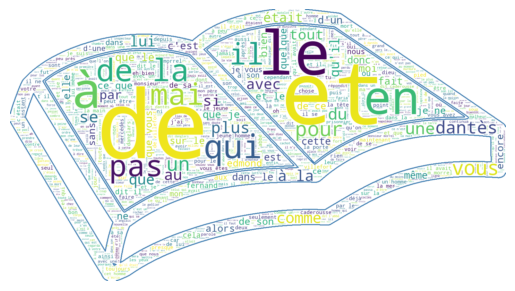

In [4]:
# Afficher le word cloud
plt.imshow(wordcloud_dumas, interpolation='bilinear')
plt.axis("off")
plt.show()

### Tokenisation

In [5]:
words = nltk.word_tokenize(dumas, language="french")
words[1030:1050]

['que',
 'voulez-vous',
 ',',
 'monsieur',
 'edmond',
 ',',
 'reprit',
 "l'armateur",
 'qui',
 'paraissait',
 'se',
 'consoler',
 'de',
 'plus',
 'en',
 'plus',
 ',',
 'nous',
 'sommes',
 'tous']

In [6]:
words = [word for word in words if word.isalpha()]
words[1030:1050]

['assez',
 'sombre',
 'obséquieux',
 'envers',
 'ses',
 'supérieurs',
 'insolent',
 'envers',
 'ses',
 'subordonnés',
 'aussi',
 'outre',
 'son',
 'titre',
 'comptable',
 'qui',
 'est',
 'toujours',
 'un',
 'motif']

In [7]:
from nltk.corpus import stopwords

print(stopwords.words("french"))

stop_words = set(stopwords.words("french"))


words = [w for w in words if not w in stop_words]
print(words[1030:1050])

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

(-0.5, 1429.5, 783.5, -0.5)

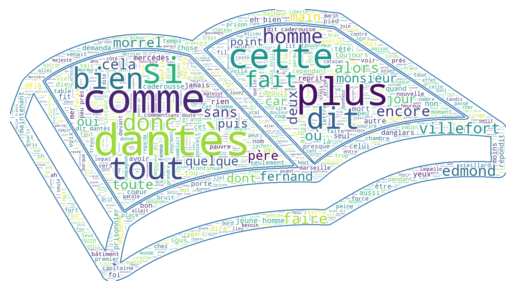

In [8]:
wc = make_wordcloud(" ".join(words))

fig = plt.figure()

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [9]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language="french")

stemmed = [stemmer.stem(word) for word in words]
print(stemmed[1030:1050])

['celui', 'dantes', 'a', 'dépos', 'pass', 'comment', 'paquet', 'dépos', 'danglar', 'roug', 'pass', 'dev', 'port', 'capitain', 'entrouvert', 'vu', 'remettr', 'paquet', 'cet', 'lettr']


In [10]:
nlp=spacy.load("fr_core_news_sm")
doc = nlp(dumas[15000:17000])
displacy.render(doc, style="ent", jupyter=True)